# Задание 1

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

### Решение

In [5]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [8]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
    predictions = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        prediction = 0
        for alg in trees_list:
            prediction += eta * alg.predict([x])[0]
        predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [9]:
# Функционал ошибки (среднеквадратичная ошибка)
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [10]:
def residual(y, z):
    return - (z - y)

In [11]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [12]:
# Число деревьев в ансамбле
n_trees = 10
n_trees_list = [3, 5, 10, 50]

# Максимальная глубина деревьев
max_depth = 3
max_depth_list = [3, 5, 10, 20]

# Шаг
eta = 1

# trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)
fit_results_n_trees = [gb_fit(trees, max_depth, X_train, X_test, y_train, y_test, eta) for trees in n_trees_list]
fit_results_max_depth = [gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, eta) for depth in max_depth_list]

In [13]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [16]:
# evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

In [17]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [19]:
# get_error_plot(n_trees, train_errors, test_errors)

Построим графики зависимости ошибок на train и test от количества деревьев (макс. глубина дерева - 3)

Количество деревьев: 3


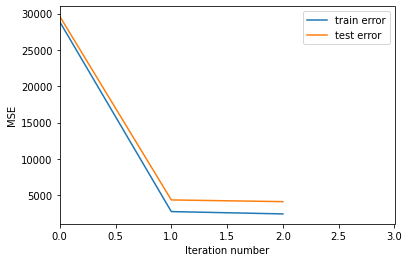

Количество деревьев: 5


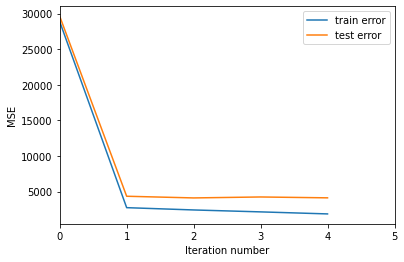

Количество деревьев: 10


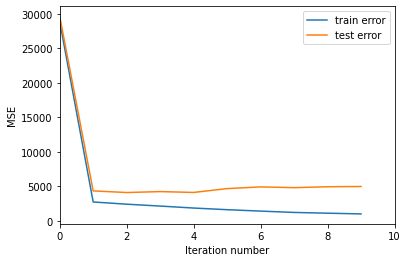

Количество деревьев: 50


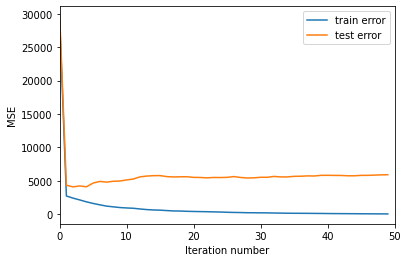

In [20]:
for id, result in enumerate(fit_results_n_trees):
    print(f'Количество деревьев: {n_trees_list[id]}')
    get_error_plot(n_trees_list[id], result[1], result[2])

При увеличении количества деревьев на данной выборке происходит расхождение графиков ошибок на train и test
Соответственно происходит переобучение

Построим графики зависимости ошибок на train и test от глубины дерева (на 10 деревьях)

Максимальная глубина дерева: 3


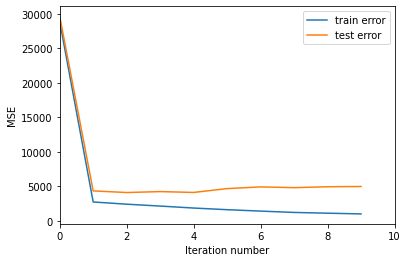

Максимальная глубина дерева: 5


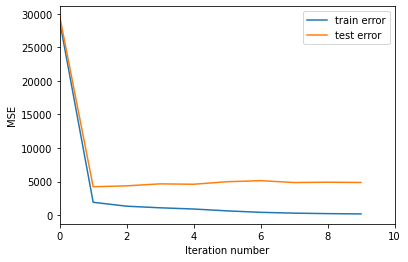

Максимальная глубина дерева: 10


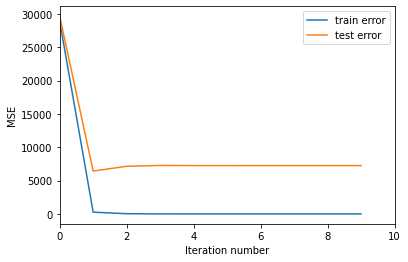

Максимальная глубина дерева: 20


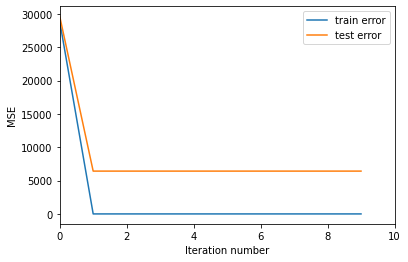

In [21]:
for id, result in enumerate(fit_results_max_depth):
    print(f'Максимальная глубина дерева: {max_depth_list[id]}')
    get_error_plot(10, result[1], result[2])

При увеличении параметра максимальной глубины наблюдается "выпрямление" графика. Ошибка на train становится равной нулю, что говорит о переобучении модели для исходного набора данных.

# Задание 2

Модифицировать реализованный алгоритм градиентного бустинга, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

### Решение

In [41]:
def gb_stohastic_fit(n_trees, max_depth, X, y, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей выборке на каждой итерации в список
    errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # Индексы случайной выборки (0.5 исходной)
        train_idxs = np.random.randint(X.shape[0], size=int(X.shape[0]/2))
        
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X[train_idxs], y[train_idxs])
            
            errors.append(mean_squared_error(y[train_idxs], gb_predict(X[train_idxs], trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X[train_idxs], trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X[train_idxs], residual(y[train_idxs], target))
            
            errors.append(mean_squared_error(y[train_idxs], gb_predict(X[train_idxs], trees, eta)))

        trees.append(tree)
        
    return trees, errors

In [79]:
# Число деревьев в ансамбле
trees = 10

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, errors = gb_stohastic_fit(trees, max_depth, X, y, eta)

In [76]:
def get_error_plot(n_trees, train_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    trees_len = len(n_trees)
    plt.xlim(0, trees_len)
    plt.plot(range(0, trees_len), train_err, label='train error')
    plt.legend(loc='upper right')
    plt.show()

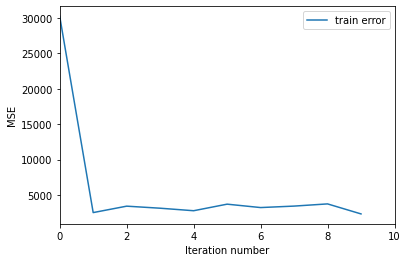

In [78]:
get_error_plot(trees, errors)